# SVM

In [1]:
from sklearn.model_selection import train_test_split
#matplotlib.use('GTKAgg')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import accuracy_score
# import some data to play with
df1=pd.read_csv("input/suyhh_so.csv",'utf-8', engine = 'python', header=0, delimiter=',')
#
print (df1.columns)
print(len(df1.columns))
X = df1[df1.columns[1:36]].values
print(X)
y = df1[df1.columns[36]].values
print(y)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size = 0.4)
clf = svm.SVC()
svc = clf.fit(Xtrain, Ytrain)
#print('Predicting class of:', str(svm.predict(Xtest)))
Ypred = clf.predict(Xtest)
#Ypred = 
print('đo chính xac:',accuracy_score(Ytest, Ypred))

Index(['Patient_Id', 'HST', 'SHC', 'Creati', 'Chole', 'Hemat', 'BCTT',
       'BCAxit', 'Lymph%', 'Acid Uric', 'BCAxit%', 'Monoxit%', 'MCHC', 'MPV',
       'Trigly', 'K+', 'HDL', 'BCTT%', 'Glucose', 'AST', 'Cl-', 'RDW%', 'PDW%',
       'Ure', 'PCT', 'BCBaso', 'Monoxit', 'ALT', 'Lymph', 'Baso%', 'LDL', 'Na',
       'SLBC', 'MCH', 'MCV', 'SLTC', 'Diag_Info', 'Namsinh', 'Gioitinh'],
      dtype='object')
39
[[125.     4.1   82.3  ...  30.4   86.8  338.  ]
 [131.     5.1   85.9  ...  25.8   76.9  344.8 ]
 [108.89   3.95  65.59 ...  23.33  68.36 213.23]
 ...
 [150.     5.    74.22 ...  30.2   83.1  192.9 ]
 [158.2    5.8  109.   ...  27.1   80.3  211.2 ]
 [132.4    4.7   71.4  ...  28.2   83.1  285.9 ]]
['KSHH' 'KSHH' 'KSHH' ... 'KSHH' 'KSHH' 'KSHH']
đo chính xac: 0.8424404961448206


# SVM Max

Automatically created module for IPython interactive environment


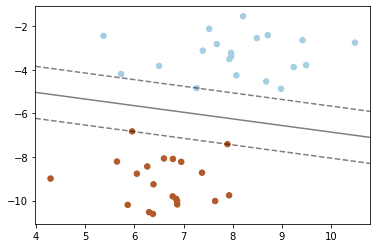

In [3]:

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs


# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none')
plt.show()

# SVM - Sklearn

C:\Users\hungnd\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


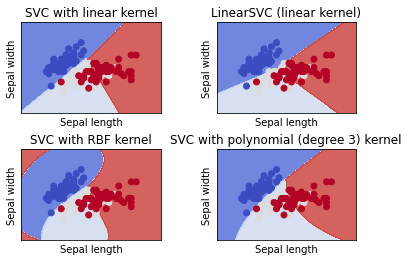

In [4]:
import matplotlib

#matplotlib.use('GTKAgg')

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
# avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()